In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [102]:
# import the dataset
train = pd.read_csv("/Users/qinruili/Downloads/covid19.csv")

# data analysis
display(train.head())
display(train.describe())
print("Number of provinces: ", train["prname"].nunique())
display(np.sort(train["prname"].unique()))
display(np.sort(train['pruid'].unique()))
print("Dates go from day", min(train['date']), "to day", max(train['date']), ", a total of", train['date'].nunique(), "days")


,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numtoday,percentoday
0,35,Ontario,Ontario,31-01-2020,3,0,0,3,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0,1,NaN,NaN,NaN
2,1,Canada,Canada,31-01-2020,4,0,0,4,NaN,NaN,NaN
3,35,Ontario,Ontario,08-02-2020,3,0,0,3,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,08-02-2020,4,0,0,4,NaN,NaN,NaN


,pruid,numconf,numprob,numdeaths,numtotal,numtested,numtoday,percentoday
count,432.000000,432.000000,432.000000,432.000000,432.000000,375.000000,0.0,0.0
mean,38.157407,447.995370,7.981481,5.467593,455.976852,17421.061333,NaN,NaN
std,25.951288,1494.178387,62.433256,20.009484,1499.843201,42275.574102,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,12.000000,2.000000,0.000000,0.000000,2.750000,188.000000,NaN,NaN
50%,46.000000,13.000000,0.000000,0.000000,17.500000,1910.000000,NaN,NaN
75%,59.000000,152.000000,0.000000,0.000000,155.750000,11631.000000,NaN,NaN
max,99.000000,12938.000000,833.000000,214.000000,12956.000000,309211.000000,NaN,NaN


Number of provinces:  16


array(['Alberta', 'British Columbia', 'Canada', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador',
       'Northwest Territories', 'Nova Scotia', 'Nunavut', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Repatriated Travellers',
       'Repatriated travellers', 'Saskatchewan', 'Yukon'], dtype=object)

array([ 1, 10, 11, 12, 13, 24, 35, 46, 47, 48, 59, 60, 61, 62, 99])

Dates go from day 01-03-2020 to day 31-03-2020 , a total of 41 days


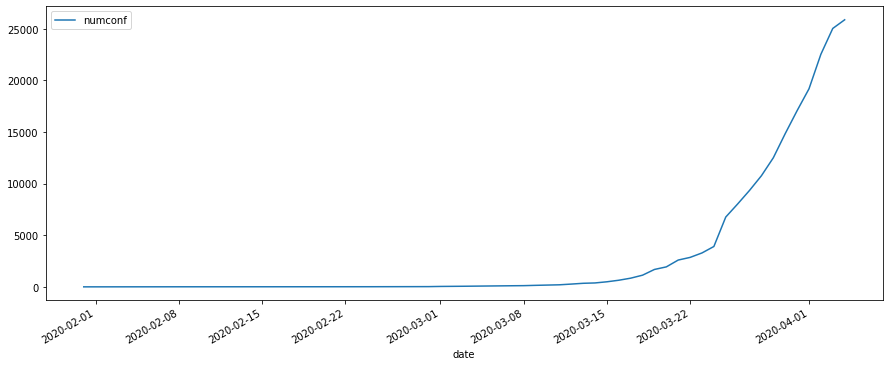

In [103]:
# clean date time data
train['date'] = pd.to_datetime(train.date, format='%d-%m-%Y')

# plot the data
total_confirmed_cases = train.groupby(['date']).numconf.sum().reset_index('date')
total_confirmed_cases.describe()
plt.figure(figsize=(15,6))
total_confirmed_cases.plot(kind='line',x='date',y='numconf', ax=plt.gca())
plt.show()

In [104]:
# import dataset for canadian 2016 consus

header_list = ['Year', 'Geo_Code', 'Geo_Level', 'GEO_NAME', 'GNR',
       'GNR_LF', 'DATA_QUALITY_FLAG', 'ALT_GEO_CODE',
       'Topic',
       'MEMBER_ID',
       'Notes',
       'Sex',
       'Male',
       'Female']
consus = pd.read_csv("/Users/qinruili/Downloads/98-401-X2016059_English_CSV_data.csv", names=header_list)

# drop irrevelant columns
consus = consus.reindex(consus.index.drop(0)).reset_index(drop=True)
consus.drop(['Year', 'Geo_Level','GNR', 'GNR_LF', 'DATA_QUALITY_FLAG', 'ALT_GEO_CODE', 'MEMBER_ID','Notes'] ,inplace=True, axis=1)

# set geo_code to number
consus['Geo_Code'] = pd.to_numeric(consus['Geo_Code'])

# drop Canada data
consus.drop(consus[consus.Geo_Code == 1].index, axis=0, inplace=True)

# Rename sex to population density
consus.rename(columns={'Sex': 'Population Density'}, inplace = True)

display(consus.columns)
consus.head()

Index(['Geo_Code', 'GEO_NAME', 'Topic', 'Population Density', 'Male',
       'Female'],
      dtype='object')

,Geo_Code,GEO_NAME,Topic,Population Density,Male,Female
2247,10,Newfoundland and Labrador,"Population, 2016",519716,...,...
2248,10,Newfoundland and Labrador,"Population, 2011",514536,...,...
2249,10,Newfoundland and Labrador,"Population percentage change, 2011 to 2016",1,...,...
2250,10,Newfoundland and Labrador,Total private dwellings,265739,...,...
2251,10,Newfoundland and Labrador,Private dwellings occupied by usual residents,218673,...,...


In [105]:
# Extract population density
population_density = consus[consus['Topic'].str.match('Population density per square kilometre')].set_index('Geo_Code')
population_density

,GEO_NAME,Topic,Population Density,Male,Female
Geo_Code,,,,,
10,Newfoundland and Labrador,Population density per square kilometre,1.4,...,...
11,Prince Edward Island,Population density per square kilometre,25.1,...,...
12,Nova Scotia,Population density per square kilometre,17.4,...,...
13,New Brunswick,Population density per square kilometre,10.5,...,...
24,Quebec,Population density per square kilometre,6,...,...
35,Ontario,Population density per square kilometre,14.8,...,...
46,Manitoba,Population density per square kilometre,2.3,...,...
47,Saskatchewan,Population density per square kilometre,1.9,...,...
48,Alberta,Population density per square kilometre,6.4,...,...


In [106]:
train.set_index('pruid', inplace=True, drop=True)
# remember to set train index to pruid
# join two datasets by index(province Id)
population_df = population_density.join(train)

population_df['Population Density'] = pd.to_numeric(population_df['Population Density'])
population_df

,GEO_NAME,Topic,Population Density,Male,Female,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numtoday,percentoday
10,Newfoundland and Labrador,Population density per square kilometre,1.4,...,...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,2020-03-11,0,0,0,0,44.0,NaN,NaN
10,Newfoundland and Labrador,Population density per square kilometre,1.4,...,...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,2020-03-12,0,0,0,0,52.0,NaN,NaN
10,Newfoundland and Labrador,Population density per square kilometre,1.4,...,...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,2020-03-13,0,0,0,0,52.0,NaN,NaN
10,Newfoundland and Labrador,Population density per square kilometre,1.4,...,...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,2020-03-14,0,0,0,0,62.0,NaN,NaN
10,Newfoundland and Labrador,Population density per square kilometre,1.4,...,...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,2020-03-15,0,1,0,1,62.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Nunavut,Population density per square kilometre,0.0,...,...,Nunavut,Nunavut,2020-03-31,0,0,0,0,167.0,NaN,NaN
62,Nunavut,Population density per square kilometre,0.0,...,...,Nunavut,Nunavut,2020-04-01,0,0,0,0,183.0,NaN,NaN
62,Nunavut,Population density per square kilometre,0.0,...,...,Nunavut,Nunavut,2020-04-02,0,0,0,0,193.0,NaN,NaN
62,Nunavut,Population density per square kilometre,0.0,...,...,Nunavut,Nunavut,2020-04-03,0,0,0,0,207.0,NaN,NaN


In [107]:
# drop irrevelant columns
population_df.columns
population_df.drop(['Topic', 'Male', 'Female','prname',
       'prnameFR', 'numprob', 'numdeaths',
       'numtested', 'numtoday', 'percentoday'] ,inplace=True, axis=1)
population_df.head()


,GEO_NAME,Population Density,date,numconf,numtotal
10,Newfoundland and Labrador,1.4,2020-03-11,0,0
10,Newfoundland and Labrador,1.4,2020-03-12,0,0
10,Newfoundland and Labrador,1.4,2020-03-13,0,0
10,Newfoundland and Labrador,1.4,2020-03-14,0,0
10,Newfoundland and Labrador,1.4,2020-03-15,0,1


737427

In [108]:
# convert date to ordinal
import datetime as dt

start_date = pd.to_datetime('03-01-2020',format='%d-%m-%Y').toordinal()

population_df['date'] = pd.to_datetime(population_df['date'],format='%d-%m-%Y')
#population_df['date']=population_df['date'].map(dt.datetime.toordinal - start_date)
population_df['date'] = population_df['date'].apply(lambda x: x.toordinal()-start_date)

#population_df = population_df[population_df['GEO_NAME'].str.match('Ontario')]
#population_df

In [109]:
population_df.head()

,GEO_NAME,Population Density,date,numconf,numtotal
10,Newfoundland and Labrador,1.4,68,0,0
10,Newfoundland and Labrador,1.4,69,0,0
10,Newfoundland and Labrador,1.4,70,0,0
10,Newfoundland and Labrador,1.4,71,0,0
10,Newfoundland and Labrador,1.4,72,0,1


In [55]:
'''
window = pd.Timestamp.now().toordinal() - start_date - 14
Y = population_df[(population_df['date'] >= window) & (population_df['numconf'] != 0)]['numconf'].apply(lambda x: np.log(x)).values
#Y = population_df[population_df['numconf'] != 0]['numconf'].values
X = population_df[(population_df['date'] >= window) & (population_df['numconf'] != 0)].loc[:,'Population Density':'date'].values
Y

'''

"\nwindow = pd.Timestamp.now().toordinal() - start_date - 14\nY = population_df[(population_df['date'] >= window) & (population_df['numconf'] != 0)]['numconf'].apply(lambda x: np.log(x)).values\n#Y = population_df[population_df['numconf'] != 0]['numconf'].values\nX = population_df[(population_df['date'] >= window) & (population_df['numconf'] != 0)].loc[:,'Population Density':'date'].values\nY\n\n"

In [126]:
from sklearn.linear_model import LinearRegression

window = pd.Timestamp.now().toordinal() - start_date - 14
Y = population_df[(population_df['date'] >= window) & (population_df['numconf'] != 0) & (population_df['Population Density'] != 0)]['numconf'].apply(lambda x: np.log(x)).values
#Y = population_df[population_df['numconf'] != 0]['numconf'].values
X = population_df[(population_df['date'] >= window) & (population_df['numconf'] != 0) & (population_df['Population Density'] != 0)].loc[:,'Population Density':'date'].values
mlr = LinearRegression()

# fit linear regression
mlr.fit(X, Y)

# get the slope and intercept of the line best fit.
print(mlr.intercept_)
# -244.92350252069903

print(mlr.coef_)
# [ 5.97694123 19.37771052]


-9.510558745736631
[-0.01221955  0.1682526 ]


In [127]:
# test1
import datetime as dt
import numpy as np
date = pd.Timestamp.now().toordinal()
y_prediction = mlr.predict([[14.8, date-start_date]])
print(date-start_date, y_prediction)
np.exp(y_prediction)

93 [5.95608336]


array([386.09496476])

In [128]:
# test2
density_data = population_df[population_df['Population Density'] != 0]['Population Density'].unique()
density = pd.DataFrame()
density['Population Density'] = density_data
density['date'] = pd.Timestamp.now().toordinal() - start_date
X_test = density.loc[:,'Population Density':'date'].values
X_test

array([[ 1.4, 93. ],
       [25.1, 93. ],
       [17.4, 93. ],
       [10.5, 93. ],
       [ 6. , 93. ],
       [14.8, 93. ],
       [ 2.3, 93. ],
       [ 1.9, 93. ],
       [ 6.4, 93. ],
       [ 5. , 93. ],
       [ 0.1, 93. ]])

In [129]:
Y_test = mlr.predict(X_test)
def sum_cases(x):
    sum = 0
    for num in x:
        sum = sum + np.exp(num)
    return sum

result = sum_cases(Y_test)
prev_data = population_df[population_df['date'] == date - start_date - 1]['numtotal'].sum()
prev_data + result



17562.124227887965